# Лабораторная работа № 2.

## Линейная нейронная сеть. Правило обучения Уидроу-Хоффа

Целью работы является исследование свойств линейной нейронной сети и алгоритмов ее
обучения, применение сети в задачах аппроксимации и фильтрации.

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Глобальные константы

In [2]:
EPOCHES = 10
D = 5

Вспомогательная функция

In [3]:
def visualize(x, y, train_x, train_y, model, h):
    figure = plt.figure(figsize=(20, 10))
    pred = model.predict(train_x)
    axes = figure.add_subplot(221)
    plt.plot(x[D:], y[D:])
    plt.plot(x[D:], pred)
    plt.ylabel("y")
    plt.xlabel("x")
    axes = figure.add_subplot(222)
    epticks = [(i + 1) for i in range(len(h))]
    plt.plot(epticks, h, "g")
    plt.ylabel("mae")
    plt.xlabel("Эпохи")
    plt.xticks(epticks)
    axes = figure.add_subplot(223)
    plt.plot(x[D:], y[D:] - pred.flat, "r")
    plt.ylabel("Разность предсказания и сигнала, y")
    plt.xlabel("x")
    plt.show()

### Задание 1

In [4]:
def signal(t):
    return np.sin(-3 * t **2 + 10 * t - 5)

Исходный сигнал

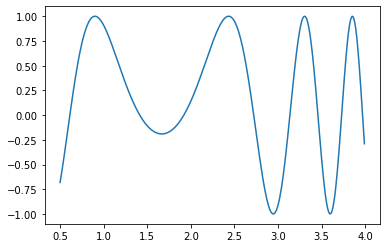

In [5]:
h = 0.01
x = np.arange(0.5, 4, h)
y = signal(x)

plt.plot(x, y)
plt.show()

Подготовка обучающих данных

In [6]:
n = x.shape[0]

train_x, train_y = [], []

for i in range(n - D):
    xx = y[i:i + D]
    yy = y[i + D]
    train_x.append(xx)
    train_y.append(yy)

train_x = np.array(train_x)
train_y = np.array(train_y)

Построение и обучение модели

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim = D, activation = "linear")
])

model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.05),
    loss = "mse",
    metrics = ["mae"]
)

h = model.fit(x = train_x, y = train_y, batch_size = 1, epochs = EPOCHES, verbose = False, shuffle = True)

Визуализация результата

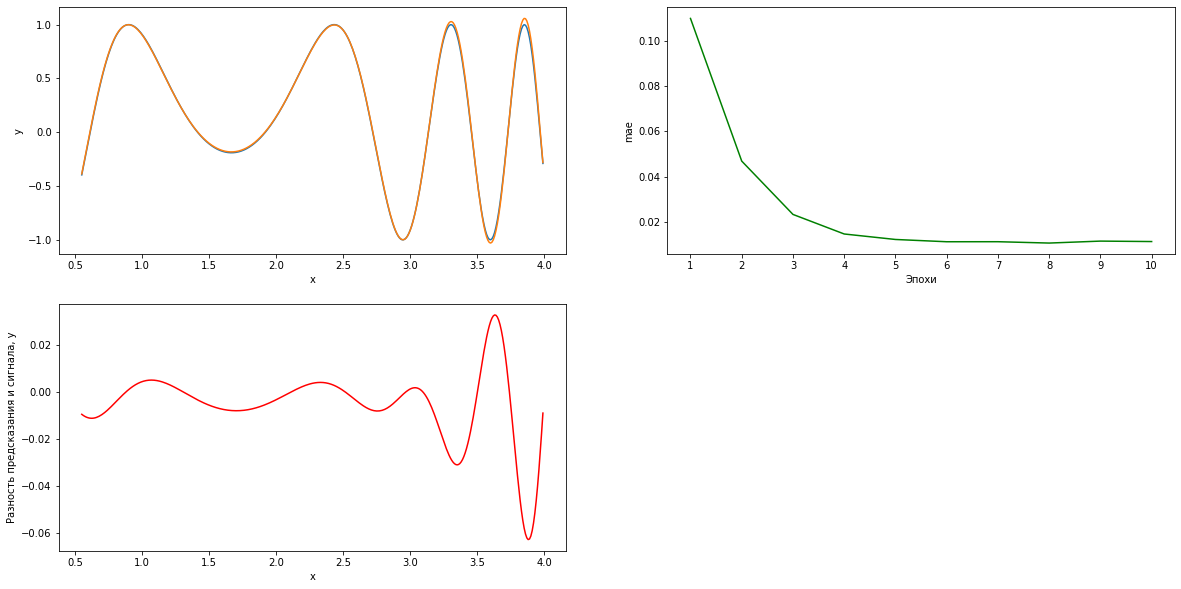

In [8]:
visualize(x, y, train_x, train_y, model, h.history["mae"])

### Задание 2

In [9]:
def signal_true(t):
    return np.sin(2 * t ** 2 - 6 * t + 3)

def signal_noise(t):
    return 0.5 * np.sin(2 * t ** 2 - 6 * t - np.pi)

Визуализация сигналов

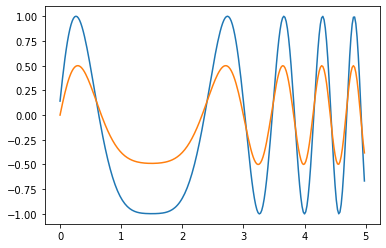

In [10]:
h = 0.02
x = np.arange(0, 5, h)
y_true = signal_true(x)
y_noise = signal_noise(x)

plt.plot(x, y_true)
plt.plot(x, y_noise)
plt.show()

Подготовка обучающих данных

In [11]:
n = x.shape[0]

train_x, train_y = [], []

for i in range(n - D):
    xx = y_noise[i:i + D]
    yy = y_true[i + D]    
    train_x.append(xx)
    train_y.append(yy)

train_x = np.array(train_x)
train_y = np.array(train_y)

Построение и обучение модели

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim = D, activation = "linear")
])

model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.05),
    loss = "mse",
    metrics = ["mae"]
)

h = model.fit(x = train_x, y = train_y, batch_size = 1, epochs = EPOCHES, verbose = False, shuffle = True)

Визуализация результата

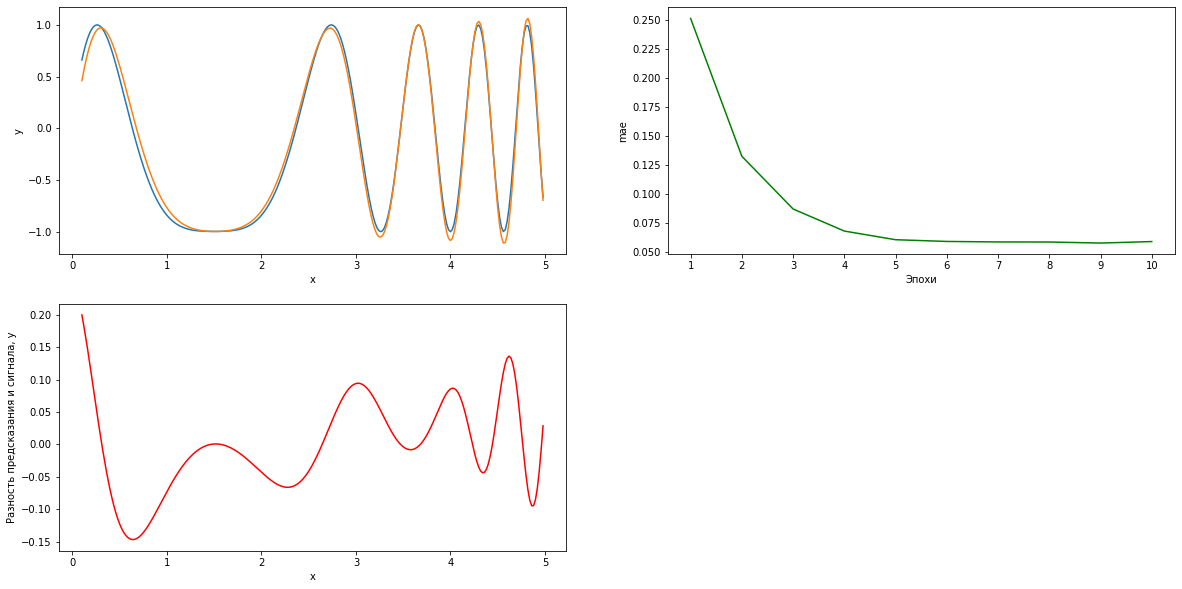

In [13]:
visualize(x, y_true, train_x, train_y, model, h.history["mae"])

### Вывод

В ходе выполнения лабораторной работы я ознакомился с задачами апроксимации и фильтрации, реализовал их решение с помощью однослойной нейросети.